In [1]:
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
movies = pd.read_csv(os.getcwd() + '/movie-ratings.csv')

In [3]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']
movies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CriticRating,559.0,47.309481,26.413091,0.0,25.0,46.0,70.0,97.0
AudienceRating,559.0,58.744186,16.826887,0.0,47.0,58.0,72.0,96.0
BudgetMillions,559.0,50.236136,48.731817,0.0,20.0,35.0,65.0,300.0
Year,559.0,2009.152057,1.362632,2007.0,2008.0,2009.0,2010.0,2011.0


In [4]:
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [6]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [7]:
movies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CriticRating,559.0,47.309481,26.413091,0.0,25.0,46.0,70.0,97.0
AudienceRating,559.0,58.744186,16.826887,0.0,47.0,58.0,72.0,96.0
BudgetMillions,559.0,50.236136,48.731817,0.0,20.0,35.0,65.0,300.0


In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline


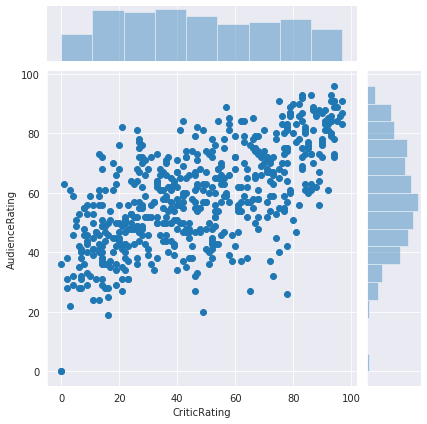

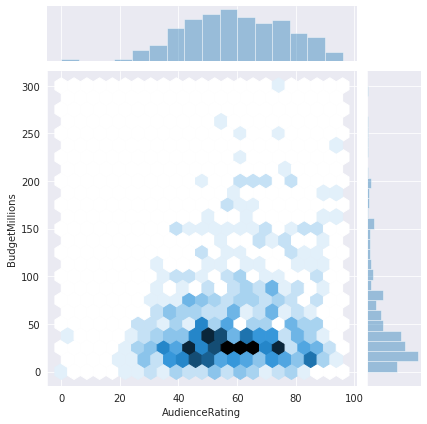

In [9]:
#Joint Plots
j = sns.jointplot(data=movies, \
                  x='CriticRating', \
                  y='AudienceRating')

j = sns.jointplot(data=movies, \
                  x='AudienceRating', \
                  y='BudgetMillions', \
                  kind='hex')

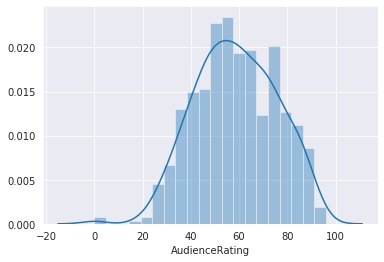

In [10]:
# Histograms with Seaborn
m1 = sns.distplot(movies.AudienceRating, \
                 bins=20)

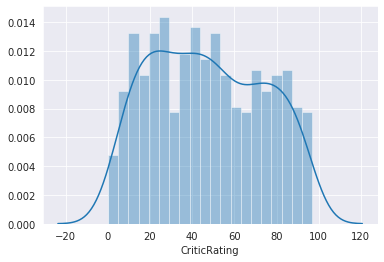

In [11]:
m2 = sns.distplot(movies.CriticRating, \
                 bins=20)

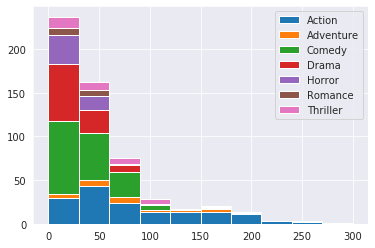

In [12]:
# Stacked Histograms with pyplot
dataset = list()
datalabels = list()
for genre in movies.Genre.cat.categories:
    dataset.append(movies[movies.Genre == genre].BudgetMillions)
    datalabels.append(genre)
plt.hist(dataset, label=datalabels, stacked=True)
plt.legend()
plt.show()

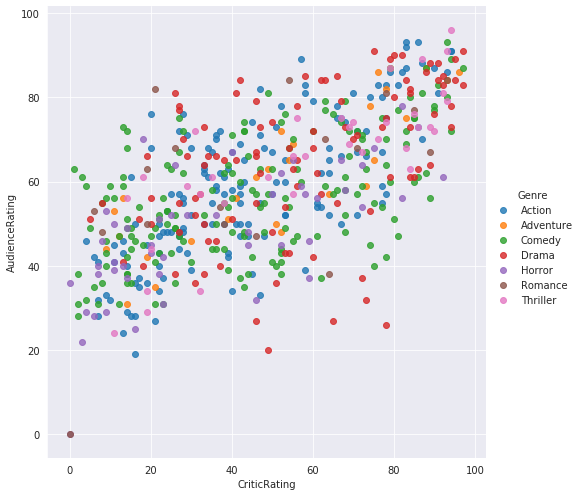

In [13]:
# Scatter Plot
vis1 = sns.lmplot(data=movies, \
                  x='CriticRating', \
                  y='AudienceRating', \
                  fit_reg=False, \
                  hue='Genre', \
                  size=7, \
                  aspect=1)

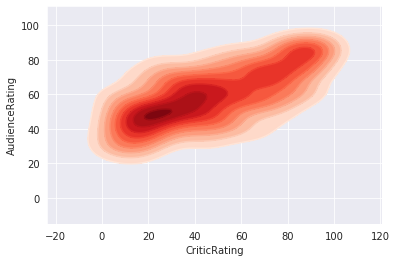

In [14]:
# KDE Plot (Kernel Density Estimate)
k1 = sns.kdeplot(data=movies.CriticRating, \
                 data2=movies.AudienceRating, \
                 shade=True, \
                shade_lowest=False, \
                cmap='Reds')
# add overlay to smooth visualization
k1overlay = sns.kdeplot(data=movies.CriticRating, \
                 data2=movies.AudienceRating, \
                cmap='Reds')

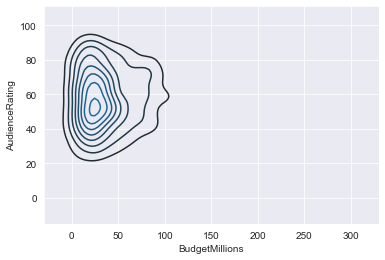

In [15]:
# Subplots
k2 = sns.kdeplot(data=movies.BudgetMillions, data2=movies.AudienceRating)

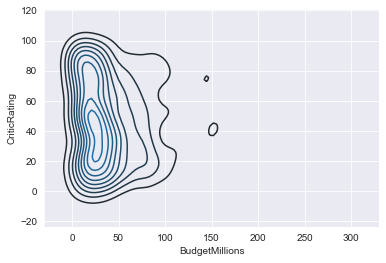

In [16]:
k3 = sns.kdeplot(data=movies.BudgetMillions, data2=movies.CriticRating)

[(-20, 160)]

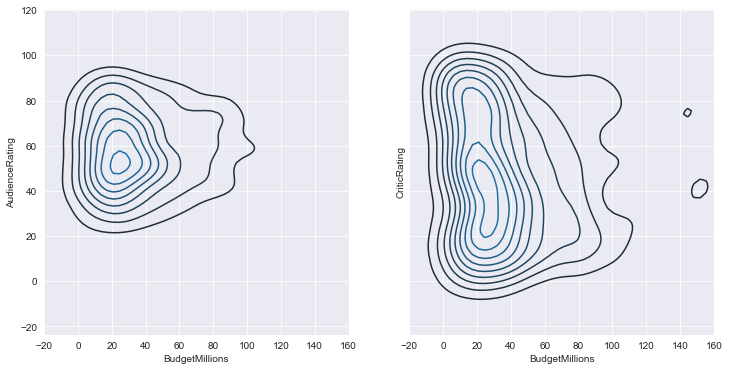

In [25]:
f, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
k2 = sns.kdeplot(data=movies.BudgetMillions, data2=movies.AudienceRating, ax=axes[0])
k3 = sns.kdeplot(data=movies.BudgetMillions, data2=movies.CriticRating, ax=axes[1])
k2.set(xlim=(-20, 160))

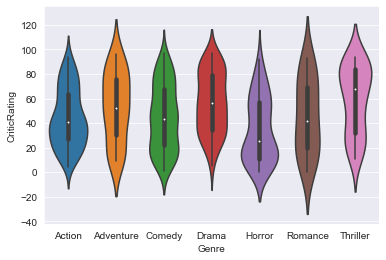

In [26]:
# Violin Plots
z = sns.violinplot(data=movies, x='Genre', y='CriticRating')

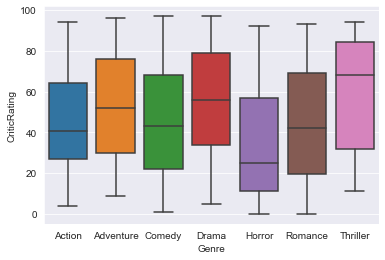

In [27]:
# Box Plot
y = sns.boxplot(data=movies, x='Genre', y='CriticRating')

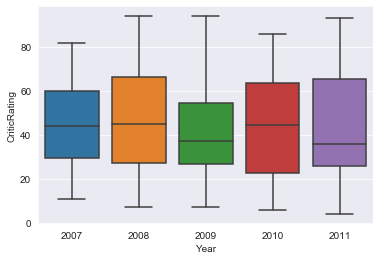

In [28]:
# Box Plot
y = sns.boxplot(data=movies[movies.Genre == 'Action'], x='Year', y='CriticRating')